# Sinha / Saha exploration

> From 4:28 mark of [New Recipe for Pi - Numberphile](https://youtu.be/nXexsSWrc1Q?t=268s)

He also discusses values for lambda (λ) at 605s (10:05).

`SinhaSaha:=(N, lambda) = 4+sum(1/k!*(1/(k+lambda)-4/(2*k+1))*pochhammer((2*k+1)^2/4/(k+lambda)-k, k-1), k=1..N);`

![Appendix snippet](./snippet.svg)


In [18]:
import sympy as sp

sp.init_printing(use_unicode=True, order='lex')


def mprint(msg: str, sym: sp.Symbol | None = None) -> None:
    print(msg)
    if sym is not None:
        sp.pprint(sym, use_unicode=True)


n = sp.symbols('n', integer=True, positive=True)
λ = sp.symbols('λ', real=True)
SinhaSaha = sp.symbols('SinhaSaha', cls=sp.Function)

## sympy representation of SinhaSaha

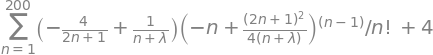

In [19]:
# num_terms = sp.symbols('num_terms', integer=True, positive=True)
# num_terms = sp.oo
num_terms = sp.Integer(200)

sum_left = (1 / sp.factorial(n)) * (1 / (n+λ) - 4 / (2*n + 1))
sum_right = (2*n + 1)**2 / (4 * (n + λ)).factor() - n

SinhaSaha = 4 + sp.Sum(sum_left * sp.rf(sum_right, n-1), (n, 1, num_terms))
SinhaSaha

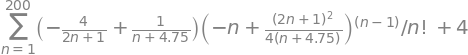

In [20]:
λ_val = 4.75
# sub_expr = SinhaSaha.subs({λ: 3.87}).doit(deep=False)  # when sum_end = 30
sub_expr: sp.Add = SinhaSaha.subs({λ: λ_val}).doit(deep=False)
sub_expr
# ss = sp.lambdify(λ, SinhaSaha, "numpy")
# a = np.arange(3)
# ss(a)

In [21]:
prec = 50

mprint(f'{num_terms=}')
mprint(f'{λ_val=}')
mprint(f'{prec=}')
print()

mprint('sub_expr:', sub_expr.evalf(prec))

pi = sp.pi.evalf(prec)
mprint('pi:', pi)

accuracy = (sub_expr - pi).evalf(prec)
mprint('sub_expr - pi:', accuracy)
digits = sp.Abs(sp.floor(sp.log(accuracy) / sp.log(10)))
mprint(f'{digits} digits accuracy')

num_terms=200
λ_val=4.75
prec=50

sub_expr:
3.1415926535898597293794409779366105794906616210938
pi:
3.1415926535897932384626433832795028841971693993751
sub_expr - pi:
0.000000000000066490916797594657107695293492221718643168329317872
14 digits accuracy
